In [15]:
#pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

In [16]:
import mlrose_hiive as mh

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

/var/folders/c6/5zg6wy5n121f2pzclkwbzplm0000gn/T/ipykernel_26828/1000570959.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


In [3]:
import pandas as pd

In [19]:
# # Flip Flop
problem_ffp = mh.FlipFlopGenerator().generate(seed=0, size=28)
#state = problem_ffp.get_state()

In [20]:
# GAB runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GABFRunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[16, 18],
              mutation_rates=[0.1, 0.2]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [21]:
df_run_curves_ffp.shape

(137, 7)

In [22]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003489,17.0,0.0,16,0.1,2048
1,1,0.013415,22.0,2.0,16,0.1,2048
2,2,0.021345,22.0,3.0,16,0.1,2048
3,3,0.026927,22.0,4.0,16,0.1,2048
4,4,0.029129,22.0,5.0,16,0.1,2048


In [23]:
df_run_curves_ffp['Fitness'].max()

27.0

In [24]:
# need to check Time and FEvals

In [25]:
df_run_curves_ffp.dtypes

Iteration            int64
Time               float64
Fitness            float64
FEvals             float64
Population Size      int64
Mutation Rate      float64
max_iters            int64
dtype: object

In [26]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [27]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
14,14,0.060564,27.0,19.0,16,0.1,2048
72,57,0.113415,27.0,61.0,16,0.2,2048
97,24,0.041021,27.0,29.0,18,0.1,2048
136,38,0.074748,27.0,44.0,18,0.2,2048


In [28]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,16,0.1,19.0,14.0,0.060564
1,16,0.2,61.0,57.0,0.113415
2,18,0.1,29.0,24.0,0.041021
3,18,0.2,44.0,38.0,0.074748


In [52]:
# tentatively, pick pop size = 16 and mutation_rate = 0.1, with smallest FEvals, iterations and second smallest time

In [29]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003489,17.0,0.0,16,0.1,2048
1,1,0.013415,22.0,2.0,16,0.1,2048
2,2,0.021345,22.0,3.0,16,0.1,2048
3,3,0.026927,22.0,4.0,16,0.1,2048
4,4,0.029129,22.0,5.0,16,0.1,2048


In [30]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [31]:
# GAB runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GABFRunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[16], # 20 bits in total
              mutation_rates=[0.2])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    #df_iter_curves_ffp = df_iter_curves_ffp.append(df_run_curves_ffp_sub)
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [32]:
df_iter_curves_ffp.shape

(488, 7)

In [33]:
#df_iter_curves_ffp.to_csv('df_iter_curves_ffp_gabf_28.csv')

In [5]:
df_iter_curves_ffp = pd.read_csv("../../csv-files/df_iter_curves_ffp_gabf_28.csv")

In [34]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000620,17.0,0.0,16,0.2,2048
1,1,0.007789,22.0,2.0,16,0.2,2048
2,2,0.019022,22.0,3.0,16,0.2,2048
3,3,0.026781,22.0,4.0,16,0.2,2048
4,4,0.028772,22.0,5.0,16,0.2,2048


In [35]:
df_iter_curves_ffp.Iteration.max()

59

In [36]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [37]:
df_fitness_iter_ffp.shape

(60, 3)

In [38]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,14.0,5.333333
1,1,18.1,3.433333
2,2,18.7,3.788889
3,3,19.4,2.044444
4,4,19.7,2.455556


In [39]:
df_iter_curves_ffp.Fitness.max()

27.0

In [40]:
# convergence
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

57    57
42    42
56    56
50    50
53    53
43    43
59    59
34    34
45    45
39    39
Name: Iteration, dtype: int64

In [41]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

59

In [42]:
df_fitness_iter_ffp.avg_fitness.max()

27.0

In [43]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [44]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,14.0,5.333333,2.309401
1,1,18.1,3.433333,1.852926
2,2,18.7,3.788889,1.946507
3,3,19.4,2.044444,1.429841
4,4,19.7,2.455556,1.567021


In [45]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= 26]['Iteration'].min()

42

Text(0, 0.5, 'Fitness')

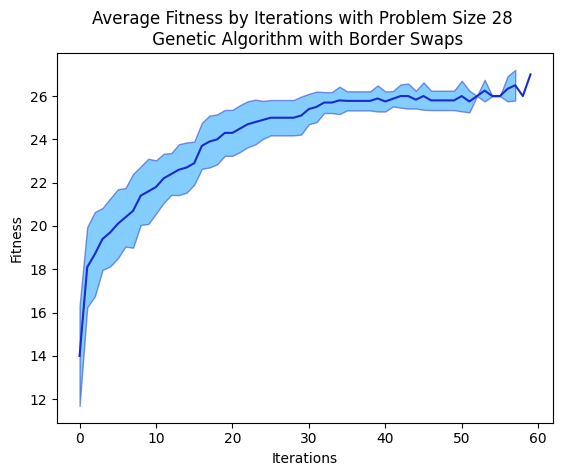

In [46]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#1B2ACC')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Average Fitness by Iterations with Problem Size 28 \n Genetic Algorithm with Border Swaps')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [47]:
# Fevals - iteration

In [6]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [7]:
df_FEvals_iter_ffp.to_csv("../../csv-files/df_FEvals_iter_ffp_28.csv")

In [8]:
df_FEvals_iter_ffp.avg_FEvals.max()

67.0

In [49]:
df_FEvals_iter_ffp.shape

(60, 3)

In [50]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.8,0.177778
2,2,3.1,0.322222
3,3,4.5,0.500000
4,4,5.8,0.622222


In [51]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [52]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 4.0)

In [53]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.8,0.177778,0.421637
2,2,3.1,0.322222,0.567646
3,3,4.5,0.500000,0.707107
4,4,5.8,0.622222,0.788811


Text(0, 0.5, 'FEvals')

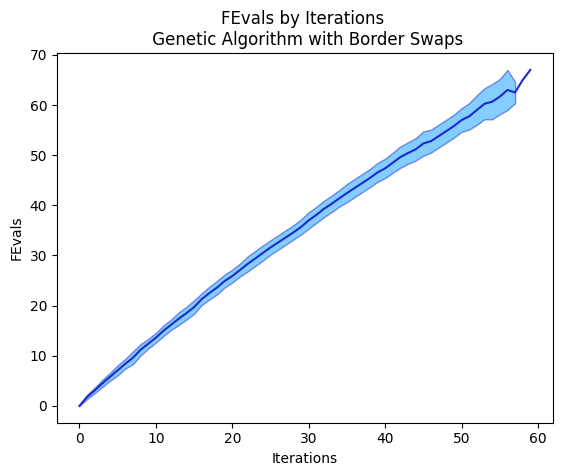

In [54]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#1B2ACC')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('FEvals by Iterations \n Genetic Algorithm with Border Swaps')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [55]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp.stddev_FEvals == 0]['Iteration']

0    0
Name: Iteration, dtype: int64

In [56]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp.stddev_FEvals == df_FEvals_iter_ffp.stddev_FEvals.max()]

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
56,56,63.0,16.0,4.0


In [79]:
# fitness - wall clock time

In [9]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [10]:
df_time_iter_ffp.to_csv("../../csv-files/df_time_iter_ffp_28.csv")

In [11]:
df_time_iter_ffp.avg_time.max()

0.4726646569906734

In [58]:
df_time_iter_ffp.shape

(60, 3)

In [59]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.000596,1.639492e-07
1,1,0.011659,1.179610e-04
2,2,0.019465,1.301189e-04
3,3,0.030469,2.952168e-04
4,4,0.033484,3.332817e-04


In [60]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [61]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.000596,1.639492e-07,0.000405
1,1,0.011659,1.179610e-04,0.010861
2,2,0.019465,1.301189e-04,0.011407
3,3,0.030469,2.952168e-04,0.017182
4,4,0.033484,3.332817e-04,0.018256


In [62]:
df_time_iter_ffp[df_time_iter_ffp.Iteration == 92]

,Iteration,avg_time,var_time,stddev_time


In [63]:
df_time_iter_ffp[df_time_iter_ffp.Iteration == 62]

,Iteration,avg_time,var_time,stddev_time


In [64]:
df_time_iter_ffp.stddev_time.max()

0.19373999745131426

Text(0, 0.5, 'Time')

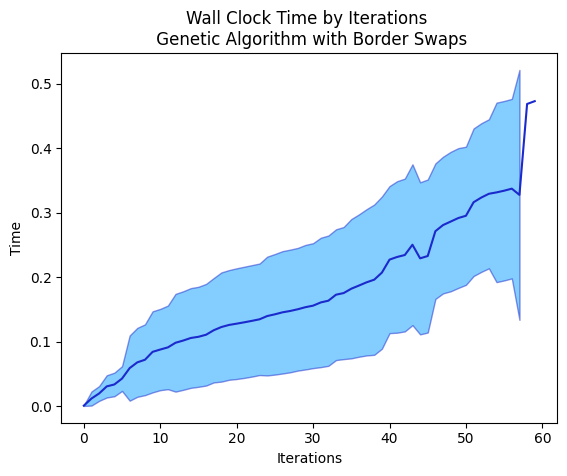

In [65]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#1B2ACC')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Wall Clock Time by Iterations \n Genetic Algorithm with Border Swaps')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [66]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time==df_time_iter_ffp.stddev_time.max()].Iteration

57    57
Name: Iteration, dtype: int64